<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y


In [28]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Ridge, Lasso

import plotly.express as px

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
# Reading data
strength = pd.read_excel(r'C:\Users\USER\Downloads\ConcreteDataForProject.xls')
# look at the first 10 rows using head()
strength.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


The data on the compressive strength of concrete was obtained from Kaggle.
[https://www.kaggle.com/datasets/sinamhd9/concrete-comprehensive-strength?resource=download, https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength}]

Concrete is the most used material for construction in the world! There are some components that should be combined to make the concrete. These components can affect the compressive strength of the concrete. The components such as cement, aggregates, water and admixtures along with the age of the concrete are the feature variables. The target variable is the concrete compressive strength.

Feature variables:
- Cement
- Water
- coarse Aggregate
- Fine Aggregate
- Fly Ash
- Superplasticizer
- Blast Furnace Slag

Target variable:
- Compressive strength of concrete

Additional details:
- Number of instances 1030
- Number of Attributes 9
- Attribute breakdown 8 quantitative input variables, and 1 quantitative output variable
- Missing Attribute Values None

In [4]:
strength.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# 2. Objectives


The objective of the analysis is to predict the compressive strength of concrete.

## Data exploration


In [5]:
strength.index.is_unique

True

In [6]:
strength.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

The data does not have any duplicates and missing values.

In [7]:
# to list the top features based on pearson correlation coefficient
str_corr = strength.corr()['Concrete compressive strength'][:-1] 
top_features = str_corr[abs(str_corr) > 0.4].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.3
print("There are {} strongly correlated values with concrete compressive strength:\n{}".format(len(top_features), top_features))

There are 1 strongly correlated values with concrete compressive strength:
Cement    0.497833
Name: Concrete compressive strength, dtype: float64


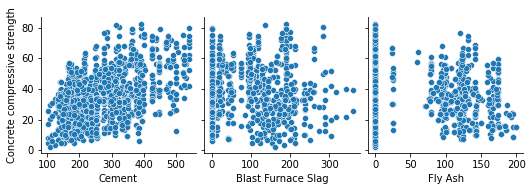

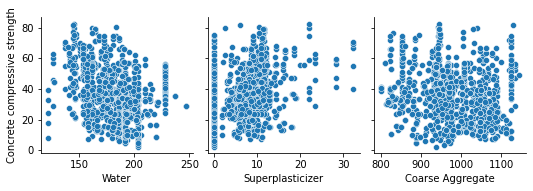

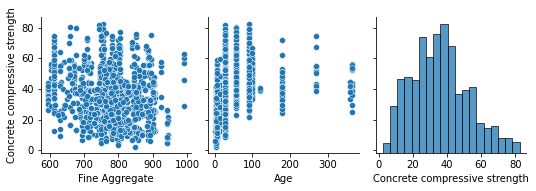

In [8]:
# pair plot to visually inspect the correlation between the feature variables and target variable
for i in range(0, len(strength.columns), 3):
    sns.pairplot(data=strength,
                x_vars=strength.columns[i:i+3],
                y_vars=['Concrete compressive strength'])

## Feature scaling
The data is scaled using standardization technique.

In [9]:
# standardization
scaled_data = StandardScaler().fit_transform(strength)
scaled_data

array([[ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  2.64519215],
       [ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  1.5612771 ],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -2.24091255,
         3.55306569,  0.26660766],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ...,  0.08012724,
        -0.27973311, -0.7259282 ],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.19118775,
        -0.27973311, -0.18264932],
       [-0.19401043,  0.30850389,  0.37696733, ..., -0.15072887,
        -0.27973311, -0.20461667]])

# 3. Linear Regression Models


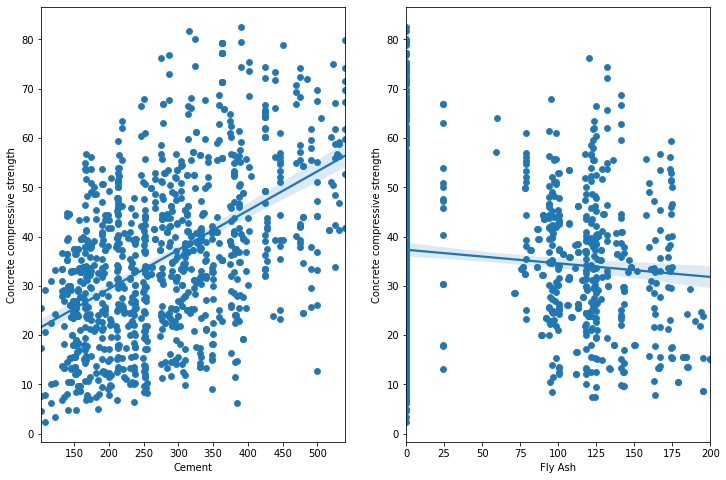

In [10]:
# Check for linearity assumption
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
sns.scatterplot( x = strength['Cement'], y = strength['Concrete compressive strength'],  ax=ax1)
sns.regplot(x=strength['Cement'], y=strength['Concrete compressive strength'], ax=ax1)
 
sns.scatterplot(x = strength['Fly Ash'],y = strength['Concrete compressive strength'], ax=ax2)
sns.regplot(x=strength['Fly Ash'], y=strength['Concrete compressive strength'], ax=ax2);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


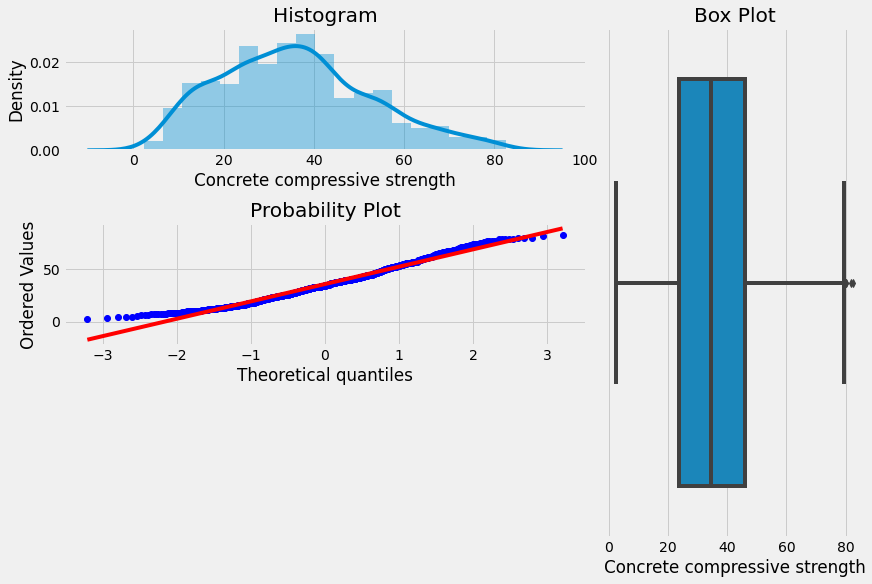

In [11]:
# Noramlity check
def plotting_3_chart(data, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);
    
plotting_3_chart(strength, 'Concrete compressive strength')

The above results indicates that the target vairable has a faily normal distribution with less skewness. There are laso very few outliers in the target variable.

In [13]:
#Separate our features from our target
# X-features
X = strength.loc[:,['Cement', 'Water', 'Fine Aggregate', 
                      'Coarse Aggregate', 'Fly Ash', 'Blast Furnace Slag', 
                      'Superplasticizer', 'Age']]
# Y-target
Y = strength['Concrete compressive strength']

In [14]:
# Training and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=0)
print("Number of test samples:", x_test.shape[0])
print("Number of training samples:", x_train.shape[0])

Number of test samples: 309
Number of training samples: 721


## Linear regression

9.675968392349501


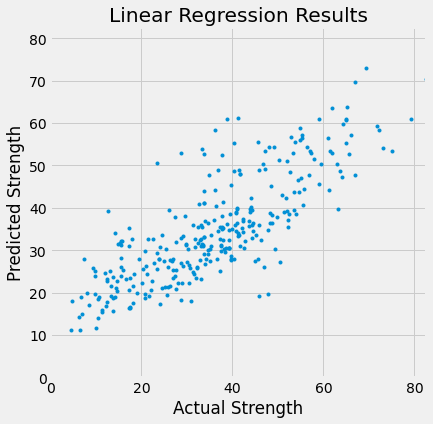

In [27]:
# linear regression
lm = LinearRegression()
lm.fit(x_train,y_train)
# prediction
predicted_strength = lm.predict(x_test)
# Root mean squared error
lr_rmse = np.sqrt(mean_squared_error(y_test, predicted_strength))
print(lr_rmse)

# Linear regression results plot
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, predicted_strength, 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Strength', 
       ylabel='Predicted Strength', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

## Polynomial regression

7.214983942351985
R^2 on training data: 0.9379622379416045
R^2 on testing data: 0.7972107637475361


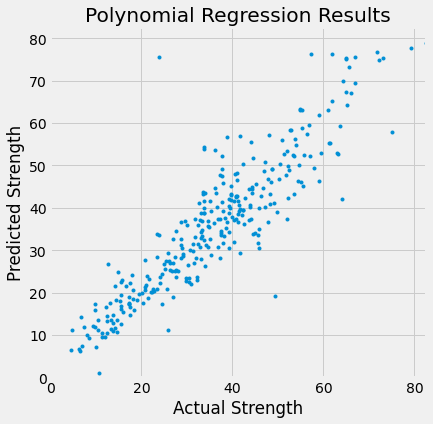

In [26]:
# Polynomial regression
poly_features = PolynomialFeatures(degree=3, include_bias=False)

x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

lm = LinearRegression()
lm.fit(x_train_poly, y_train)

predicted = lm.predict(x_test_poly)

# Root mean squared error
lr_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print(lr_rmse)

# r2
print("R^2 on training data:", lm.score(x_train_poly, y_train))
print("R^2 on testing data:", lm.score(x_test_poly,y_test))

# Linear regression results plot
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, predicted, 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Strength', 
       ylabel='Predicted Strength', 
       xlim=lim,
       ylim=lim,
       title='Polynomial Regression Results');

## Ridge regression

7.126618367103882


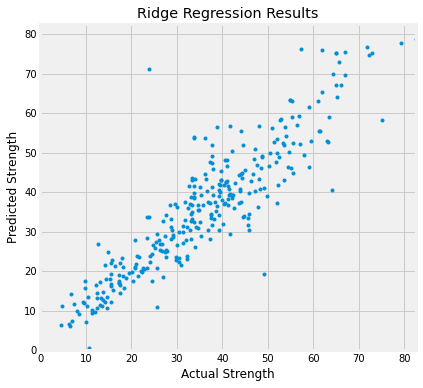

In [34]:
# Ridge regression
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

rr = Ridge(alpha=0.001)
rr = rr.fit(x_train_poly, y_train)
predicted_rr = rr.predict(x_test_poly)

# Root mean squared error
lr_rmse = np.sqrt(mean_squared_error(y_test, predicted_rr))
print(lr_rmse)

# Linear regression results plot
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, predicted_rr, 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Strength', 
       ylabel='Predicted Strength', 
       xlim=lim,
       ylim=lim,
       title='Ridge Regression Results');

## Lasso regression

6.568885045946178


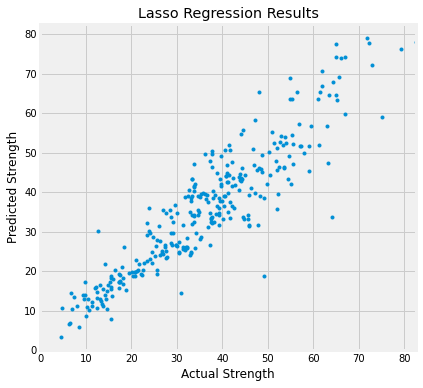

In [35]:
# Lasso regression
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(x_train_poly, y_train)
predicted_lr = lassor.predict(x_test_poly)

# Root mean squared error
lr_rmse = np.sqrt(mean_squared_error(y_test, predicted_lr))
print(lr_rmse)

# Linear regression results plot
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, predicted_lr, 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Strength', 
       ylabel='Predicted Strength', 
       xlim=lim,
       ylim=lim,
       title='Lasso Regression Results');



# 4. Insights and key findings


The compressive strength of concrete was predicted using different regression models. 

Based on results, the Lasso regression model performs better in terms of accuracy.

# 5. Next Steps


From the results, it can be said that the adiditonal features that includes the curing time, environmental features and the constraints related to the experimental studies would help in improving the model further.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
